# Convolutional Neuronal Network on MNIST

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
batch_size = 128
num_classes = 10
epochs = 20
data_augmentation = True # Schalter für die Image Änderung => 
num_predictions = 20

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [8]:
# input image dimensions
img_rows, img_cols = 28, 28

# Die Input Shape muss für den ErstenLayer vorverarbeitet sein
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
from pathlib import Path
model = Path("./Data/modelcnn.json")
if model.is_file():
   # load json and create model
    json_file = open('./Data/modelcnn.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights("./Data/modelcnn.h5")
    print("Loaded model from disk")
else:
    modelcnn = Sequential()
    modelcnn.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape)) # Größe von Kernel/Filter / Activation / Input Layer
    modelcnn.add(Conv2D(64, (3, 3), activation='relu'))
    modelcnn.add(MaxPooling2D(pool_size=(2, 2)))
    modelcnn.add(Dropout(0.25))
    modelcnn.add(Flatten())
    modelcnn.add(Dense(128, activation='relu'))
    modelcnn.add(Dropout(0.5))
    modelcnn.add(Dense(num_classes, activation='softmax'))

In [10]:
modelcnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [11]:
history = modelcnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#score = model.evaluate(x_test, y_test, verbose=0)
# wird bei CNN für CIFAR "ausgefeilter"


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 175s 3ms/step - loss: 0.2688 - accuracy: 0.9175 - val_loss: 0.0710 - val_accuracy: 0.9769
Epoch 2/20
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0936 - accuracy: 0.9722 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 3/20
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0657 - accuracy: 0.9804 - val_loss: 0.0341 - val_accuracy: 0.9879
Epoch 4/20
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 0.0325 - val_accuracy: 0.9890
Epoch 5/20
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0281 - val_accuracy: 0.9913
Epoch 6/20
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0434 - accuracy: 0.9872 - val_loss: 0.0271 - val_accuracy: 0.9909
Epoch 7/20
60000/60000 [==============================] - 162

In [12]:
score = modelcnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02957646623444307
Test accuracy: 0.9914000034332275


In [13]:
# serialize model to JSON
model_json = modelcnn.to_json()
with open("./MODEL/modelcnn.json", "w") as json_file:
    json_file.write(model_json)
    # serialize weights to HDF5
modelcnn.save_weights("./MODEL/modelcnn.h5")
print("Saved model to disk")

Saved model to disk


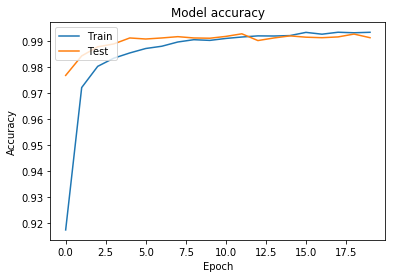

In [14]:
# Plot training & validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

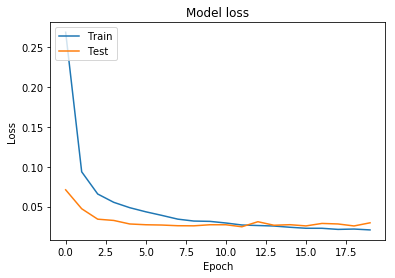

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()